# Neural Network using tensorflow
for this model whe used some information from "https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/"

In [1]:
# import libraries
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

## Load the data


In [2]:
# load data
complete_df = pd.read_csv('data/AmesHousingNN.csv')
complete_df = complete_df.drop('Unnamed: 0', axis=1)
display(complete_df)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,0.916104,0.221342,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.445524,1.674241,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.363260,-0.703563,-0.358889,-0.103618,1.844022,-0.063325,-0.089841,-0.076731,1.674241,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.361397,-0.166522,-0.358889,-0.103618,-0.286787,-0.063325,21.884177,-0.076731,1.674241,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.742429,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,1.674241,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.931900,-0.196357,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,1.674241,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0,0,0,0,0,0,0,0,0,0,...,0.205304,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,-1.359194,5.153815
2899,0,0,0,0,1,0,0,0,0,0,...,0.552806,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.076731,-1.359194,5.117271
2900,0,0,0,0,0,0,0,0,0,0,...,-0.110607,-0.226193,-0.358889,-0.103618,-0.286787,-0.063325,1.140704,0.292061,-1.359194,5.120574
2901,0,0,0,0,1,0,0,0,0,0,...,1.153037,-0.136686,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,-1.359194,5.230449


In [3]:
# split data into input and target
target = complete_df['SalePrice']
input_df = complete_df.drop('SalePrice', axis=1)

display(input_df.head())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,0.916104,0.221342,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.445524,1.674241,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.363260,-0.703563,-0.358889,-0.103618,1.844022,-0.063325,-0.089841,-0.076731,1.674241,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.361397,-0.166522,-0.358889,-0.103618,-0.286787,-0.063325,21.884177,-0.076731,1.674241,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.742429,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,1.674241,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.931900,-0.196357,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,1.674241,5.278525


In [4]:
# convert the pandas dataframes to numpy ndarrays
X_np = input_df.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)

# find number of features
n_features = input_df.shape[1]

## Build the model
The code that is written computes its own neural network models and picks the best out of it. We continue with that model.

In [5]:
def build_model(hp):
    """
    This function computes a/the best neural network for the given data. 
    It makes a model by tuning the layers and parameters of the layers for 
    the amount of trials given in the tuner variable.
    
    source: "https://keras.io/guides/keras_tuner/getting_started/"
    """
    
    # metrics for the layers
    m1 = tf.metrics.RootMeanSquaredError()
    m2 = 'mean_absolute_percentage_error'
    
    # compute a model
    model = Sequential()
    
    # tune number of layers
    for i in range(hp.Int("numlayers", 1, 3)):
        model.add(
            Dense(
                # Tune number of units separately.
                units=hp.Int(f"units{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])),
            )
        
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
        
    # output layer
    model.add(Dense(1, activation='relu'))
    
    model.compile(optimizer='Adam', loss=tf.metrics.mean_squared_error, metrics=[m1, m2])
    return model

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    #directory="my_dir",
    #project_name="helloworld",
)

# train the models with the given data
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 00m 02s]
val_loss: 0.036427129060029984

Best val_loss So Far: 0.015424537472426891
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [16]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 288)               78048     
                                                                 
 dense_1 (Dense)             (None, 192)               55488     
                                                                 
 dense_2 (Dense)             (None, 32)                6176      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 139,745
Trainable params: 139,745
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit the best model
best_model.fit(X_train, y_train,
          batch_size=32, epochs=50,
          validation_data=(X_test, y_test))

Epoch 1/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0146 - root_mean_squared_error: 0.1208 - mean_absolute_percentage_error: 1.8052 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586 - val_mean_absolute_percentage_error: 0.7664
Epoch 2/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200 - mean_absolute_percentage_error: 1.7907 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 0.7817
Epoch 3/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - mean_absolute_percentage_error: 1.8134 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692 - val_mean_absolute_percentage_error: 1.0108
Epoch 4/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - mean_absolute_percentage_error: 1.8297 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0856 - val_mean_absolute_p

Epoch 33/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0058 - root_mean_squared_error: 0.0765 - mean_absolute_percentage_error: 1.1478 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0624 - val_mean_absolute_percentage_error: 0.8952
Epoch 34/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - mean_absolute_percentage_error: 1.0559 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585 - val_mean_absolute_percentage_error: 0.7707
Epoch 35/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - mean_absolute_percentage_error: 1.0867 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0718 - val_mean_absolute_percentage_error: 1.0970
Epoch 36/50
64/64 [==============================] - 0s 2ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - mean_absolute_percentage_error: 1.0582 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0582 - val_mean_absolu

## Visualizing the results
Now that the model is actually build, we can visualize the outcome.

In [17]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
numlayers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [18]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
numlayers: 3
units0: 288
activation: tanh
dropout: True
units1: 192
units2: 32
Score: 0.015424537472426891
Trial summary
Hyperparameters:
numlayers: 2
units0: 512
activation: relu
dropout: False
units1: 32
Score: 0.01787980180233717
Trial summary
Hyperparameters:
numlayers: 1
units0: 256
activation: tanh
dropout: True
units1: 224
units2: 512
Score: 0.036427129060029984


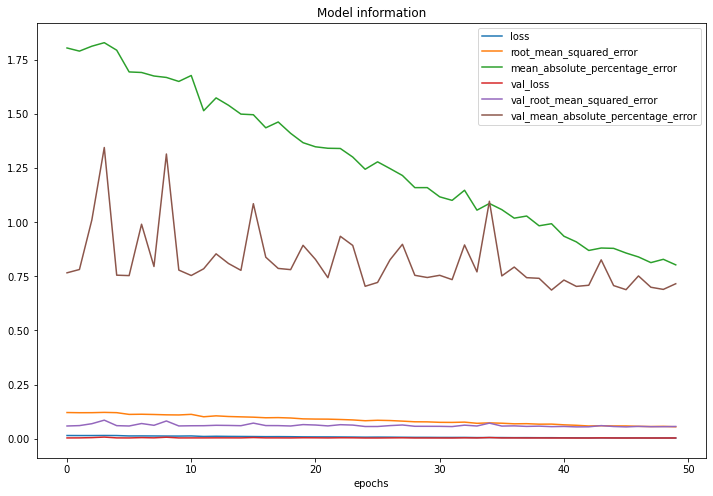

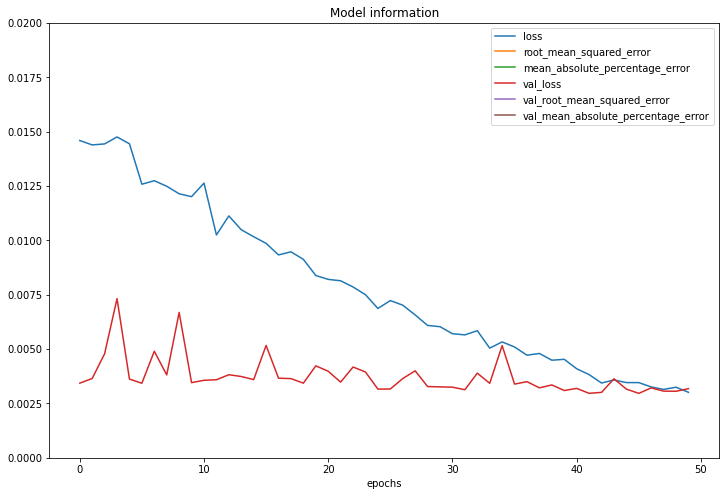

In [19]:
loss_df = pd.DataFrame(best_model.history.history)

loss_df.plot(figsize=(12,8))
plt.title("Model information")
plt.xlabel("epochs")
plt.show()

loss_df.plot(figsize=(12,8))
plt.ylim((0,0.02))
plt.title("Model information")
plt.xlabel("epochs")
plt.show()

In [20]:
from sklearn import metrics

y_pred = best_model.predict(X_test)

# compute the accuracy of the model 
print('Variance score:',metrics.explained_variance_score(y_test,y_pred))

Variance score: 0.9033541340052265


### Model 2

In [13]:
#### verbeterpunten:
# validation data gebruiken                           
# k folds
# andere metrics voor aflezen                     check
# adam vs andere andere sgd methods testen        check, Adam ziet er het best uit
# hidden layers toevoegen 
# dropout layers toevoegen                        dropout layers hebben geen positief effect op het model
# aantal nodes per layer aanpassen
# batchsize aanpassen (32, 64 of 128)             check, 32 lijkt het beste te werken
# aantal epochs                                   check, na 20 epochs lijkt het model het meest te leren, daarna improved het niet heel veel meer                                     
# onze loss plotten                               check
